##João Augusto Silva Bottrel - RID0468

Objetivo: Criar um modelo de Classificação para prever baseado nas features recebidas se o paciente apresenta algum tipo de doença cardíaca.

#0. Importando Bibliotecas

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1. Importando o Dataset

In [62]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [63]:
path='/content/gdrive/MyDrive/Colab Notebooks/Bases/heart.csv'
df=pd.read_csv(path)

#2. Análise Preliminar (EDA, Data Cleaning e geração do dataset final)

Amostragem do dataset

In [64]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0


Explicação das colunas:
- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect

Análise da estatística descritiva

In [65]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Verificação de valores nulos

In [66]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Verificação do tamanho do dataset

In [67]:
df.shape

(303, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


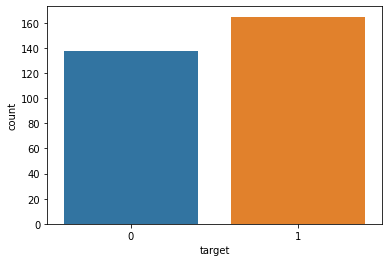

In [68]:
sns.countplot(df['target'])

Segue abaixo a distribuição de algumas variáveis contínuas, verificando visualmente a normalidade de algumas dessas variáveis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


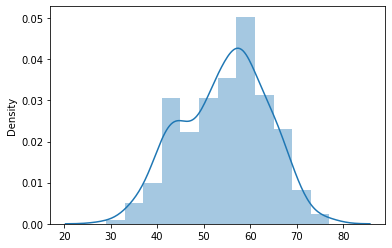

In [69]:
sns.distplot(x=df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


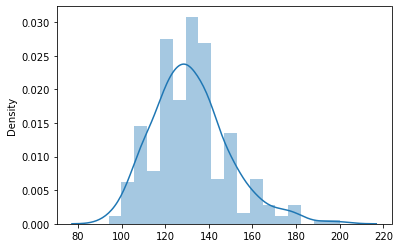

In [70]:
sns.distplot(x=df['trestbps'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


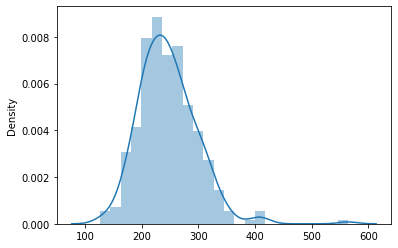

In [71]:
sns.distplot(x=df['chol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


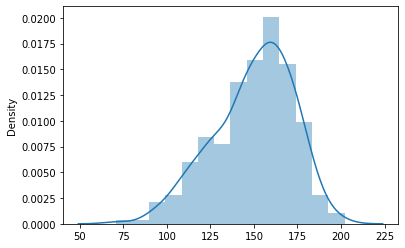

In [72]:
sns.distplot(x=df['thalach'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


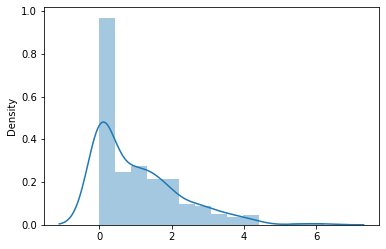

In [73]:
sns.distplot(x=df['oldpeak'])

Verificaçao inicial se alguma variável tem alguma correlação forte com a variável target

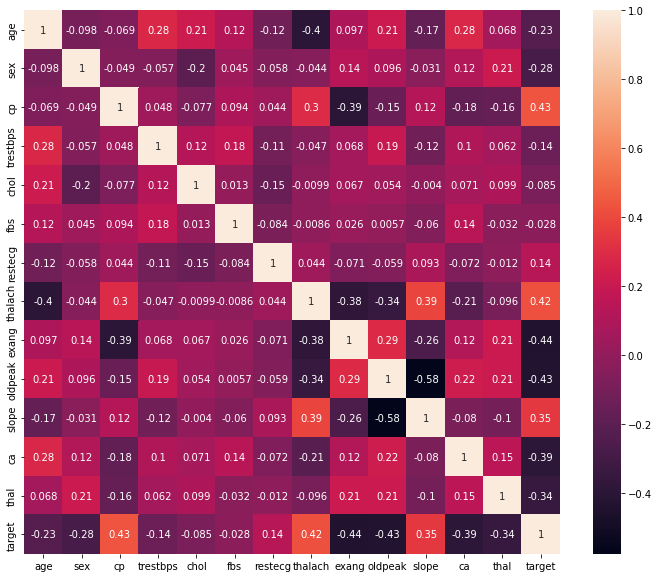

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

"Dummyficando" as variáveis categóricas "cp" "thal" e "slope", para que elas sejam definidas como presença ou ausência e seu valor numérico não impacte no resultado

In [75]:
dfa = pd.get_dummies(df['cp'], prefix = "cp")
dfb = pd.get_dummies(df['thal'], prefix = "thal")
dfc = pd.get_dummies(df['slope'], prefix = "slope")

In [76]:
#Agregar dummies ao dataset original e dropar as colunas "cp" "thal" e "slope"
dfs = [df, dfa, dfb, dfc]
df_f = pd.concat(dfs, axis = 1).drop(columns = ['cp', 'thal', 'slope'])
df_f.sample(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
88,54,0,110,214,0,1,158,0,1.6,0,1,0,0,1,0,0,0,1,0,0,1,0
203,68,1,180,274,1,0,150,1,1.6,0,0,0,0,1,0,0,0,0,1,0,1,0
73,51,1,140,261,0,0,186,1,0.0,0,1,1,0,0,0,0,0,1,0,0,0,1
214,56,1,125,249,1,0,144,1,1.2,1,0,1,0,0,0,0,0,1,0,0,1,0
289,55,0,128,205,0,2,130,1,2.0,1,0,1,0,0,0,0,0,0,1,0,1,0


#3. Pré processamento dos dados

Dividindo a base em treino e teste


In [77]:
from sklearn.model_selection import train_test_split

X = df_f.drop(columns=['target'])
Y = df_f['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [78]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (242, 21)
Shape y_train: (242,)
Shape X_test: (61, 21)
Shape y_test: (61,)


Normalizando as variáveis para impedir que variáveis com escalas maiores (centenas,milhares) impactem mais na classificação, padronizando o desvio padrão de cada variável para 1

In [79]:
# Normalização de variáveis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [80]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,-0.701600,0.702728,-0.458142,0.488861,-0.411196,-0.955442,0.751776,-0.715891,-0.478221,-0.698232,1.050880,-0.431595,-0.625144,-0.308257,-0.064416,-0.257059,-1.095445,1.254778,-0.283473,1.068454,-0.920504
1,-0.593524,0.702728,-0.804612,-1.782728,-0.411196,-0.955442,-1.029230,-0.715891,-0.219125,2.165702,-0.951584,-0.431595,1.599632,-0.308257,-0.064416,-0.257059,0.912871,-0.796954,-0.283473,-0.935932,1.086361
2,-0.053145,0.702728,-0.573632,0.706934,-0.411196,-0.955442,-1.474482,1.396861,1.853642,1.211057,1.050880,-0.431595,-0.625144,-0.308257,-0.064416,-0.257059,0.912871,-0.796954,-0.283473,1.068454,-0.920504
3,1.243766,0.702728,1.620678,-0.347084,-0.411196,-0.955442,-0.494928,-0.715891,1.076355,-0.698232,1.050880,-0.431595,-0.625144,-0.308257,-0.064416,3.890159,-1.095445,-0.796954,-0.283473,-0.935932,1.086361
4,0.919538,0.702728,-0.111672,0.125407,-0.411196,-0.955442,-0.094202,-0.715891,0.299067,0.256413,1.050880,-0.431595,-0.625144,-0.308257,-0.064416,-0.257059,-1.095445,1.254778,-0.283473,1.068454,-0.920504


In [81]:
X_train.describe().round(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.76,-1.42,-2.19,-2.20,-0.41,-0.96,-2.63,-0.72,-0.91,-0.70,-0.95,-0.43,-0.63,-0.31,-0.06,-0.26,-1.10,-0.80,-0.28,-0.94,-0.92
25%,-0.78,-1.42,-0.69,-0.68,-0.41,-0.96,-0.76,-0.72,-0.91,-0.70,-0.95,-0.43,-0.63,-0.31,-0.06,-0.26,-1.10,-0.80,-0.28,-0.94,-0.92
50%,0.05,0.70,-0.11,-0.11,-0.41,-0.96,0.13,-0.72,-0.22,-0.70,-0.95,-0.43,-0.63,-0.31,-0.06,-0.26,0.91,-0.80,-0.28,-0.94,-0.92
75%,0.81,0.70,0.47,0.54,-0.41,0.92,0.74,1.40,0.60,0.26,1.05,-0.43,1.60,-0.31,-0.06,-0.26,0.91,1.25,-0.28,1.07,1.09
max,2.43,0.70,3.47,5.76,2.43,2.80,2.35,1.40,4.44,3.12,1.05,2.32,1.60,3.24,15.52,3.89,0.91,1.25,3.53,1.07,1.09


Abaixo vamos testar alguns modelos de classificação e verificar suas métricas de performance

##3.1 Redes Neurais (MPL Classifier)

In [82]:
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

clf1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='relu')
clf1.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [85]:
y_pred_MPL = clf1.predict(X_test)
f1_MPL = round(f1_score(y_test, y_pred_MPL, average='macro')*100, 2)
accuracy_MPL = round(accuracy_score(y_test, y_pred_MPL)*100,2)
precision_MPL = round(precision_score(y_test, y_pred_MPL)*100,2)
recall_MPL = round(recall_score(y_test, y_pred_MPL)*100,2)

print(f"F1 Score: {f1_MPL}%")
print(f"Accuracy Score: {accuracy_MPL}%")
print(f"Precision Score: {precision_MPL}%")
print(f"Recall Score: {recall_MPL}%")

F1 Score: 70.29%
Accuracy Score: 70.49%
Precision Score: 68.57%
Recall Score: 77.42%


              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.69      0.77      0.73        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



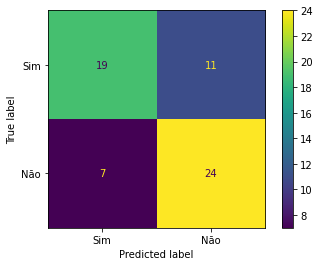

In [86]:
print(classification_report(y_test, y_pred_MPL))
plot_confusion_matrix(clf1, X_test, y_test, display_labels=["Sim", "Não"])
plt.grid(False)
plt.show()

##3.2 SVM (Support Vector Machine) Kernel Linear

In [87]:
from sklearn.svm import SVC

In [88]:
clf2 = SVC(kernel='linear', decision_function_shape='ovo')
clf2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
y_pred_SVML = clf2.predict(X_test)
f1_SVML = round(f1_score(y_test, y_pred_SVML, average='macro')*100, 2)
accuracy_SVML = round(accuracy_score(y_test, y_pred_SVML)*100,2)
precision_SVML = round(precision_score(y_test, y_pred_SVML)*100,2)
recall_SVML = round(recall_score(y_test, y_pred_SVML)*100,2)

print(f"F1 Score: {f1_SVML}%")
print(f"Accuracy Score: {accuracy_SVML}%")
print(f"Precision Score: {precision_SVML}%")
print(f"Recall Score: {recall_SVML}%")

F1 Score: 75.17%
Accuracy Score: 75.41%
Precision Score: 72.22%
Recall Score: 83.87%


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



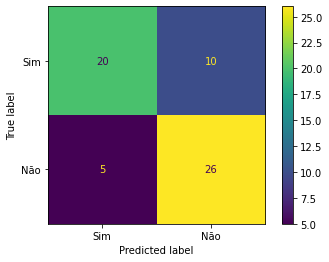

In [90]:
print(classification_report(y_test, y_pred_SVML))
plot_confusion_matrix(clf2, X_test, y_test, display_labels=["Sim", "Não"])
plt.grid(False)
plt.show()

##3.2 SVM (Support Vector Machine) Kernel Polinomial

In [91]:
clf3 = SVC(kernel='poly', decision_function_shape='ovo')
clf3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
y_pred_SVMP = clf3.predict(X_test)
f1_SVMP = round(f1_score(y_test, y_pred_SVMP, average='macro')*100, 2)
accuracy_SVMP = round(accuracy_score(y_test, y_pred_SVMP)*100,2)
precision_SVMP = round(precision_score(y_test, y_pred_SVMP)*100,2)
recall_SVMP = round(recall_score(y_test, y_pred_SVMP)*100,2)

print(f"F1 Score: {f1_SVMP}%")
print(f"Accuracy Score: {accuracy_SVMP}%")
print(f"Precision Score: {precision_SVMP}%")
print(f"Recall Score: {recall_SVMP}%")

F1 Score: 73.59%
Accuracy Score: 73.77%
Precision Score: 71.43%
Recall Score: 80.65%


              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



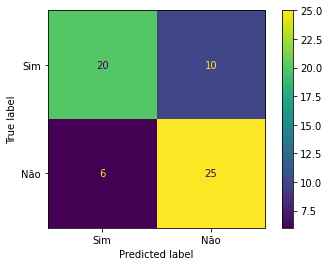

In [93]:
print(classification_report(y_test, y_pred_SVMP))
plot_confusion_matrix(clf3, X_test, y_test, display_labels=["Sim", "Não"])
plt.grid(False)
plt.show()

#3.3 Decision Tree (DT)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
clf4 = DecisionTreeClassifier(criterion="entropy")
clf4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
y_pred_DT = clf4.predict(X_test)
f1_DT = round(f1_score(y_test, y_pred_DT, average='macro')*100, 2)
accuracy_DT = round(accuracy_score(y_test, y_pred_DT)*100,2)
precision_DT = round(precision_score(y_test, y_pred_DT)*100,2)
recall_DT = round(recall_score(y_test, y_pred_DT)*100,2)

print(f"F1 Score: {f1_DT}%")
print(f"Accuracy Score: {accuracy_DT}%")
print(f"Precision Score: {precision_DT}%")
print(f"Recall Score: {recall_DT}%")

F1 Score: 70.1%
Accuracy Score: 70.49%
Precision Score: 67.57%
Recall Score: 80.65%


              precision    recall  f1-score   support

           0       0.75      0.60      0.67        30
           1       0.68      0.81      0.74        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



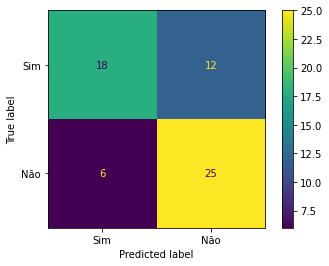

In [97]:
print(classification_report(y_test, y_pred_DT))
plot_confusion_matrix(clf4, X_test, y_test, display_labels=["Sim", "Não"])
plt.grid(False)
plt.show()

#4. Hiperparametrização (SVML_HP)

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
params_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [100]:
X_train_HP = X_train.copy()
X_test_HP = X_test.copy()
y_train_HP = y_train.copy()
y_test_HP = y_test.copy()

In [101]:
clf5 = SVC()

grid_search = GridSearchCV(clf5, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_HP, y_train_HP)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [102]:
print(grid_search.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [103]:
y_pred_HP = grid_search.predict(X_test)
f1_HP = round(f1_score(y_test, y_pred_HP, average='macro')*100, 2)
accuracy_HP = round(accuracy_score(y_test, y_pred_HP)*100,2)
precision_HP = round(precision_score(y_test, y_pred_HP)*100,2)
recall_HP = round(recall_score(y_test, y_pred_HP)*100,2)

print(f"F1 Score: {f1_HP}%")
print(f"Accuracy Score: {accuracy_HP}%")
print(f"Precision Score: {precision_HP}%")
print(f"Recall Score: {recall_HP}%")

F1 Score: 74.98%
Accuracy Score: 75.41%
Precision Score: 71.05%
Recall Score: 87.1%


              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



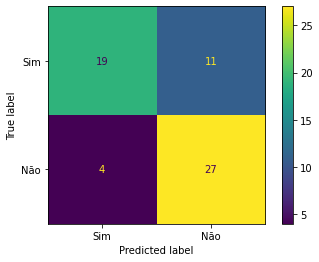

In [104]:
print(classification_report(y_test, y_pred_HP))
plot_confusion_matrix(grid_search, X_test, y_test, display_labels=["Sim", "Não"])
plt.grid(False)
plt.show()

#5. Redução de dimensionalidade

Aqui iremos reduzir a dimensionalidade do dataset para 2 features mais significativas, é possível observar que a massa de dados fica bem próxima e de difícil separação

In [105]:
from sklearn.decomposition import PCA

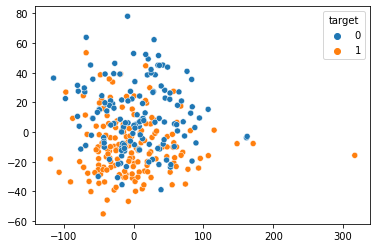

In [106]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], hue=Y)

#6.Resumo e comparação de modelos

In [109]:
lista=['MPL','SVML','SVMP','DT','SVML_HP']
resultado={'F1 Score':[f1_MPL,f1_SVML,f1_SVMP,f1_DT,f1_HP],
           'Accuracy Score':[accuracy_MPL,accuracy_SVML,accuracy_SVMP,accuracy_DT,accuracy_HP],
           'Precision Score':[precision_MPL,precision_SVML,precision_SVMP,precision_DT,precision_HP],
           'Recall Score':[recall_MPL,recall_SVML,recall_SVMP,recall_DT,recall_HP]}

In [111]:
pd.DataFrame.from_dict(resultado,orient='index',columns=lista)

,MPL,SVML,SVMP,DT,SVML_HP
F1 Score,70.29,75.17,73.59,70.10,74.98
Accuracy Score,70.49,75.41,73.77,70.49,75.41
Precision Score,68.57,72.22,71.43,67.57,71.05
Recall Score,77.42,83.87,80.65,80.65,87.10


O modelo SVM com kernel linear teve o melhor f1 score entre os modelos, porém, é interessante avaliar também o recall score, já que no caso de identificar uma doença, um verdadeiro negativo tem um peso grande sobre os falsos positivos e podem custar a vida de um paciente mal diagnosticado, no caso o melhor modelo seria o SVM com kernel linear após passar por um tunning de hiperparâmetros